In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
df =pd.read_csv(r'C:\Users\Subhasish\Downloads\archive\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
numerical_columns = df.select_dtypes(include=['int','float']).columns.tolist()
numerical_columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['sex', 'smoker', 'day', 'time']

In [11]:
ls=df.columns[df.dtypes=='object']

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [15]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [18]:
df.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [19]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [21]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

In [22]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [23]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [24]:
df.day.mode()

0    Sat
Name: day, dtype: object

In [29]:
df.groupby('day')['size'].sum().idxmax()

'Sat'

<Axes: xlabel='total_bill', ylabel='Density'>

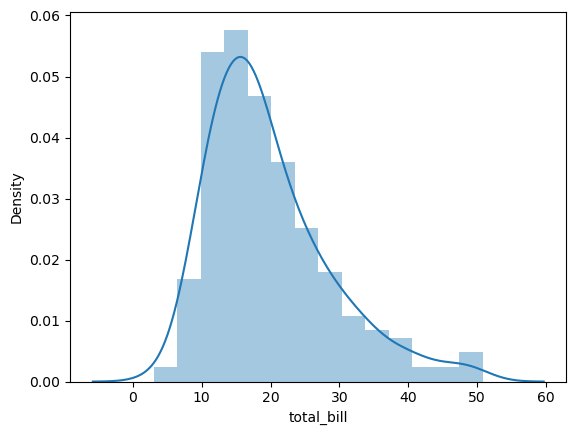

In [30]:
sns.distplot(df['total_bill'])

In [33]:
df.total_bill.skew()

1.1332130376158205

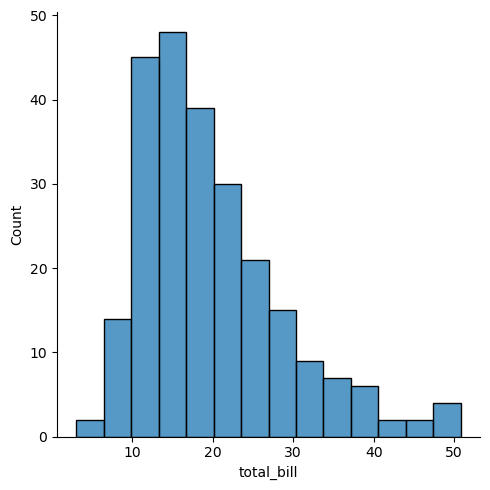

In [35]:
sns.displot(df['total_bill'])

In [36]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<Axes: xlabel='tip', ylabel='total_bill'>

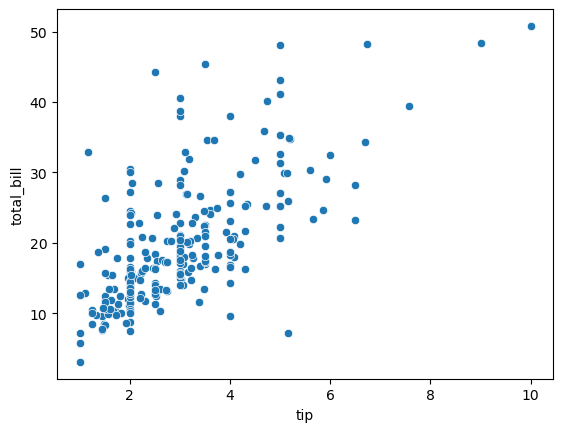

In [38]:
sns.scatterplot(x='tip',y='total_bill',data=df)

<Axes: ylabel='proportion'>

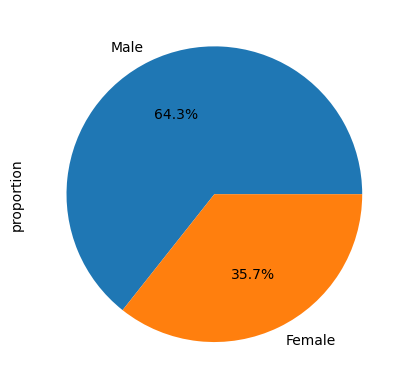

In [43]:
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.1f%%')

In [44]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

In [45]:
pd.crosstab(df['smoker'],df['sex'])

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


<Axes: xlabel='smoker'>

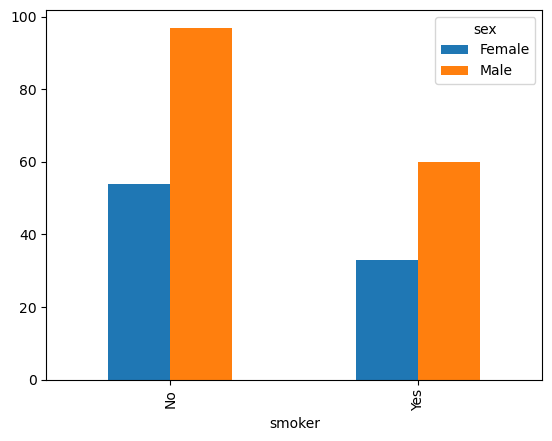

In [48]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')

In [49]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<Axes: xlabel='day', ylabel='tip'>

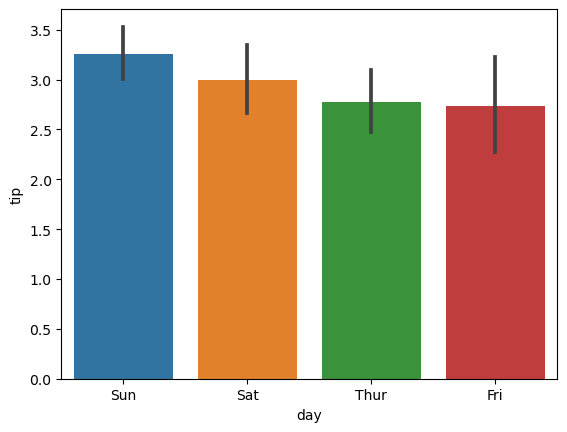

In [50]:
sns.barplot(x='day',y='tip',data=df)

<Axes: xlabel='size'>

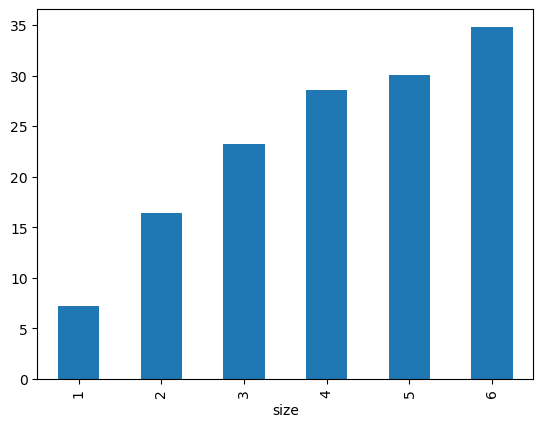

In [52]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

<Axes: xlabel='total_bill', ylabel='sex'>

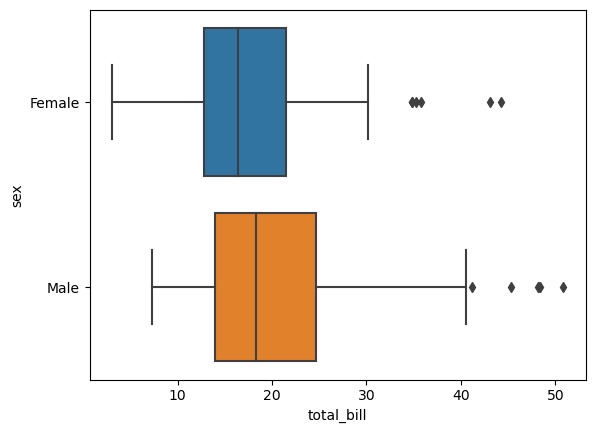

In [53]:
sns.boxplot(x='total_bill',y='sex',data=df)

In [55]:
df.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [57]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [61]:
len(df[df.duplicated()])

1

In [62]:
df.drop_duplicates(inplace=True)
len(df[df.duplicated()])

0

<Axes: >

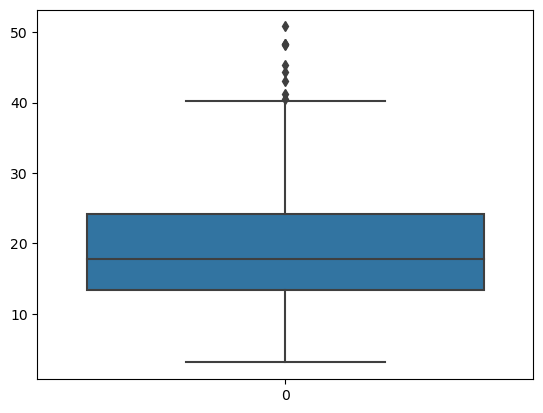

In [63]:
sns.boxplot(df['total_bill'])

<Axes: >

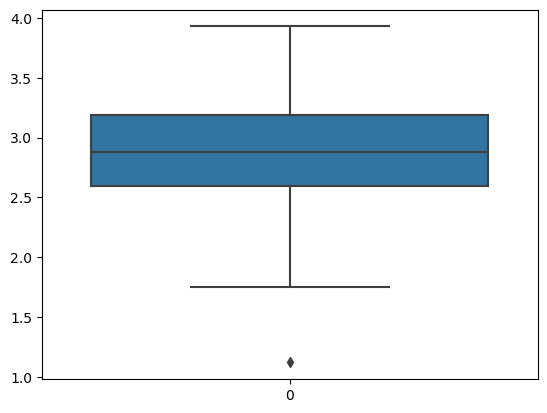

In [64]:
df['total_bill_trans']=np.log(df['total_bill'])
sns.boxplot(df['total_bill_trans'])

<Axes: >

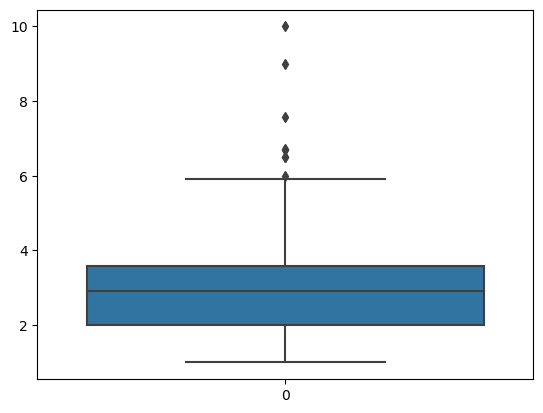

In [65]:
sns.boxplot(df['tip'])

In [66]:
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3-q1
lower_whisker=q1-(1.5*iqr)
higher_whisker=q3-(1.5*iqr)

In [68]:
df_out=df.loc[(df['tip'] <lower_whisker)&(df['tip'] >lower_whisker)]

In [71]:
sns.boxplot(df_out['tip'])

KeyError: 0

In [72]:
df=pd.get_dummies(df,drop_first=True)
df.head(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,False,False,False,True,False,False
1,10.34,1.66,3,2.336020,True,False,False,True,False,False
2,21.01,3.50,3,3.044999,True,False,False,True,False,False
3,23.68,3.31,2,3.164631,True,False,False,True,False,False
4,24.59,3.61,4,3.202340,False,False,False,True,False,False


In [73]:
df['total_bill'].max() - df['total_bill'].min()

47.74

In [74]:
mm = MinMaxScaler()

In [77]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [78]:
df['total_bill_mm'].max() - df['total_bill'].min()

-2.07

In [80]:
tips_df =pd.read_csv(r'C:\Users\Subhasish\Downloads\archive\tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [81]:
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [82]:
x = tips_df.drop('tip',axis=1)
y = tips_df['tip']

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
mm = MinMaxScaler()
x_train.iloc[:,:2] = mm.fit_transform(x_train.iloc[:,:2])
x_test.iloc[:,:2] = mm.fit_transform(x_test.iloc[:,:2])

In [89]:
x_train.iloc[:,:2]

,total_bill,size
8,0.206170,0.25
183,0.386596,0.75
150,0.184643,0.25
144,0.237017,0.25
53,0.092987,0.25
...,...,...
49,0.272747,0.25
85,0.645362,0.75
81,0.242122,0.25
33,0.331558,0.75


In [95]:
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
pred = lr.predict(x_test)

In [97]:
print('R square value', r2_score(y_test,pred))

R square value 0.543876273902336


In [101]:
lr.score(x_test,y_test)
lr.coef_

array([ 4.11551051,  0.57130806, -0.0452391 ,  0.04419089,  0.0467235 ,
        0.13143526, -0.01891544,  0.10552055])